In [ ]:
#mount drive and load csv data
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/train"

In [ ]:
import tensorflow as tf

data_dir = "/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1"                                          


In [ ]:

test_dir="/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test"

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

In [ ]:

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

#validation_generator = valid_datagen.flow_from_directory(validation_ds, target_size=(128,128),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
img=train_generator[0]
img

(array([[[[0.43137258, 0.2392157 , 0.21176472],
          [0.48627454, 0.25882354, 0.21176472],
          [0.56078434, 0.28235295, 0.21176472],
          ...,
          [0.24313727, 0.2392157 , 0.2627451 ],
          [0.2509804 , 0.24705884, 0.27058825],
          [0.2627451 , 0.25882354, 0.28235295]],
 
         [[0.427451  , 0.24313727, 0.21176472],
          [0.48627454, 0.25882354, 0.21176472],
          [0.54901963, 0.28235295, 0.20784315],
          ...,
          [0.2392157 , 0.23529413, 0.25882354],
          [0.24705884, 0.24313727, 0.26666668],
          [0.2627451 , 0.25882354, 0.28235295]],
 
         [[0.4156863 , 0.24705884, 0.22352943],
          [0.46274513, 0.25882354, 0.21568629],
          [0.5176471 , 0.27058825, 0.21176472],
          ...,
          [0.2392157 , 0.23529413, 0.25882354],
          [0.24705884, 0.24313727, 0.26666668],
          [0.2627451 , 0.25882354, 0.28235295]],
 
         ...,
 
         [[0.34509805, 0.30588236, 0.3019608 ],
          [0.34509

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
seq_model = Sequential([ 
    Flatten(input_shape=(128,128,3), name='input_layer'),
    Dense(64, activation='relu', name='layer1'),
    # Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    # Dense(32, activation='relu', name='layer4'),
    Dense(4, activation='softmax', name='output_layer')
])

In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 49152)             0         
                                                                 
 layer1 (Dense)              (None, 64)                3145792   
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 4)                 132       
                                                                 
Total params: 3,148,004
Trainable params: 3,148,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
type(data_dir)

str

In [ ]:
seq_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  

In [ ]:
har=seq_model.fit(train_generator,validation_data=test_generator,epochs=30, batch_size=32)

Epoch 1/30
113/113 [==============================] - 14s 113ms/step - loss: 0.1834 - accuracy: 0.9531 - val_loss: 2.5090 - val_accuracy: 0.4963
Epoch 2/30
113/113 [==============================] - 12s 107ms/step - loss: 0.2193 - accuracy: 0.9300 - val_loss: 2.4246 - val_accuracy: 0.4925
Epoch 3/30
113/113 [==============================] - 12s 106ms/step - loss: 0.0802 - accuracy: 0.9728 - val_loss: 2.3683 - val_accuracy: 0.4913
Epoch 4/30
113/113 [==============================] - 12s 108ms/step - loss: 0.2207 - accuracy: 0.9208 - val_loss: 2.5405 - val_accuracy: 0.5088
Epoch 5/30
113/113 [==============================] - 12s 106ms/step - loss: 0.0584 - accuracy: 0.9839 - val_loss: 2.5515 - val_accuracy: 0.5000
Epoch 6/30
113/113 [==============================] - 12s 108ms/step - loss: 0.0367 - accuracy: 0.9922 - val_loss: 4.1165 - val_accuracy: 0.4688
Epoch 7/30
113/113 [==============================] - 12s 106ms/step - loss: 0.5554 - accuracy: 0.8331 - val_loss: 2.2819 - val_ac

In [ ]:
import numpy as np 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(har.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.183429,0.953056,2.508958,0.49625
1,0.219316,0.930000,2.424579,0.49250
2,0.080170,0.972778,2.368350,0.49125
3,0.220736,0.920833,2.540527,0.50875
4,0.058362,0.983889,2.551489,0.50000


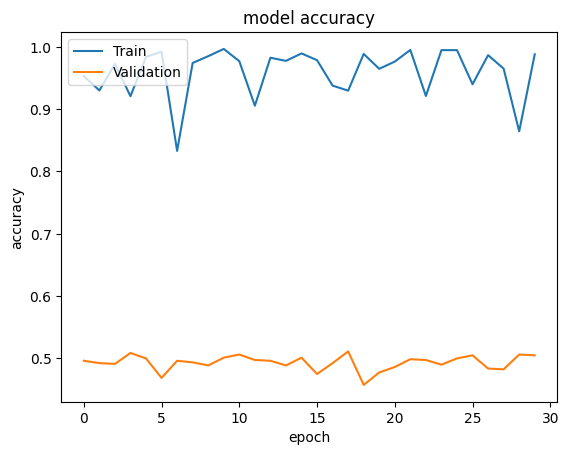

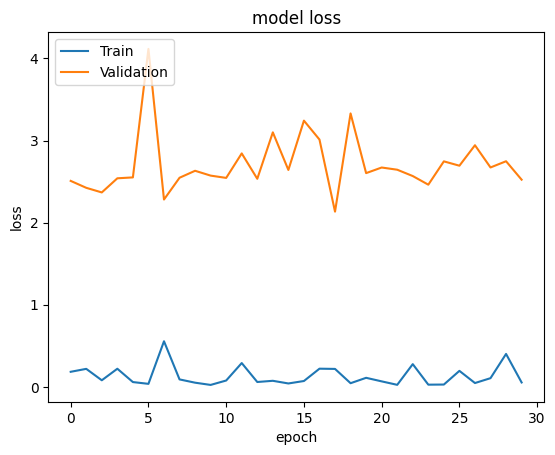

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(har.history['accuracy'])
plt.plot(har.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(har.history['loss'])
plt.plot(har.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
los = tf.keras.losses.SparseCategoricalCrossentropy()


seq_model.compile(
    
    optimizer = opt,
    loss = los,
    metrics=acc
)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

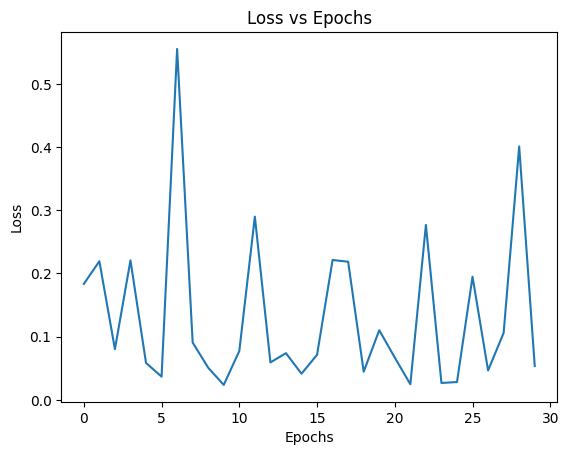

In [ ]:
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

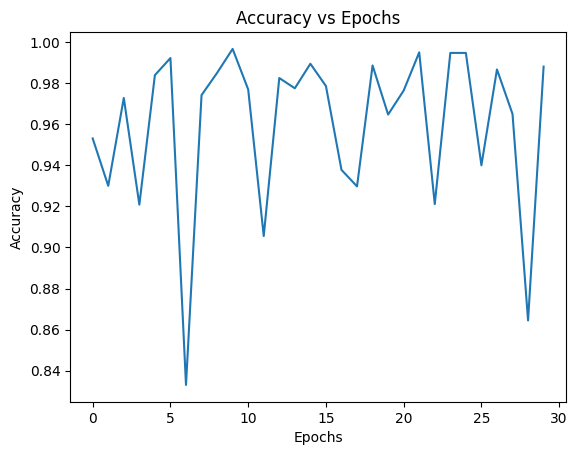

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

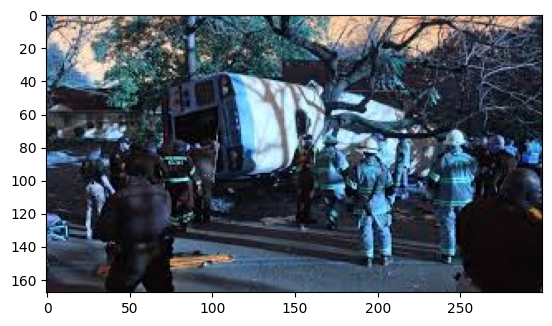

In [ ]:

import cv2

t=cv2.imread('/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test/accident/images_016.jpg')
plt.imshow(t)

In [ ]:
labels = ['accident', 'dense_traffic','fire','sparse_traffic']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=seq_model.predict(h)
classnames=["fire","sparse_traffic","dense_traffic","accident"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 0s 52ms/step


'sparse_traffic'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

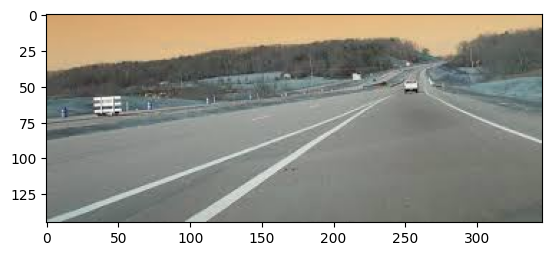

In [ ]:
t=cv2.imread('/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test/sparse_traffic/images_007 (2).jpg')
plt.imshow(t)

In [ ]:

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=seq_model.predict(h)
classnames=["fire","sparse_traffic","dense_traffic","accident"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 0s 21ms/step


'sparse_traffic'

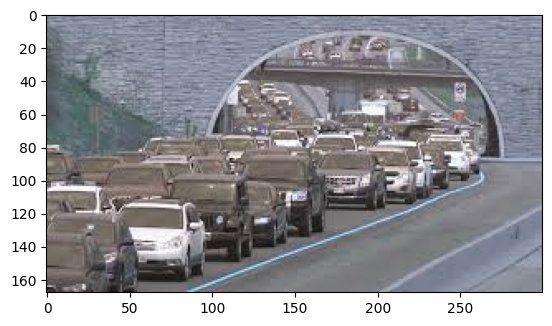

In [ ]:
t=cv2.imread('/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test/dense_traffic/images_011.jpg')
plt.imshow(t)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=seq_model.predict(h)
classnames=["fire","sparse_traffic","dense_traffic","accident"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 0s 21ms/step


'accident'